# Challenge $0$
Riccardo Striano


## 1. ***Data cleaning with Pandas***

Use the library `pandas` to load and clean the required dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy.linalg as LA
from numpy.linalg import inv
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.naive_bayes import CategoricalNB, GaussianNB, ComplementNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

Obtain the data file

In [3]:
FFILE = './50_Startups.csv'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        
else:
    print("Either the file is missing or not readable, download it")
    

File already exists
File is readable


In [4]:
import pandas as pd

# Load the dataset using Pandas
data = pd.read_csv('50_Startups.csv')

# Extracting the features (independent variables) and labels (dependent variable)
# Features (X) are taken from all columns except the last two
features = data.iloc[:, :-2].values

# Labels (y) are taken from the third column (index 3, considering the 0-based index in Python)
labels = data.iloc[:, 3].values

df = pd.DataFrame(data)

In [5]:
labels

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

***Play with data***

In [6]:
df.shape
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
means = df.select_dtypes(include='number').mean()
df.replace(to_replace = 0.00, value = means, inplace=True)  # inject the mean of the column when value is 0
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


 **`df.replace()` function:**
   - This function is used to replace specific values within a DataFrame (`df`) with another value.
   - The parameters used are:
     - `to_replace=0.00`: This specifies the value in the DataFrame that needs to be replaced, in this case, `0.00`.
     - `value=df.mean(axis=0)`: This sets the replacement value for the matched condition. Here, `df.mean(axis=0)` calculates the mean for each column along the rows (axis=0) of the DataFrame `df`. The mean value for each column will replace the `0.00` values.
     - `inplace=True`: This parameter ensures that the modification is done directly on the original DataFrame (`df`) without creating a new DataFrame. If `inplace` is set to `True`, the original DataFrame is modified.

***Select two categories for binary classification***

In [8]:
df_sel=df[(df.State=="California") | (df.State=="Florida")]

In [9]:
df_sel.head() # column title and first rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [10]:
df_sel.dtypes # type of each column

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

***Encode categorical data***

One-hot encoding of categorical feature _State_

One-Hot Encoding is a technique used in machine learning to handle categorical variables by transforming them into a format that can be easily utilized by algorithms.

Imagine having a categorical variable, such as colors: red, green, and blue. With One-Hot Encoding, each color becomes a new binary column. If an observation has a specific color, the column corresponding to that color will be set to 1, while the other columns will be set to 0.

For example:
- If you have categories "red", "green", "blue", and you want to encode them using One-Hot Encoding:
  - "red" becomes [1, 0, 0]
  - "green" becomes [0, 1, 0]
  - "blue" becomes [0, 0, 1]

This helps machine learning algorithms to understand and work with these categorical variables more effectively, as it doesn't impose an order or hierarchy among the categories but rather represents them in a form that the algorithm can interpret more efficiently.

In [11]:
df_one = pd.get_dummies(df_sel["State"])

In [12]:
df_one.head()

,California,Florida
1,True,False
2,False,True
4,False,True
6,True,False
7,False,True


In [13]:
# Constructing the final dataset for learning and prediction

# Concatenating two DataFrames 'df_one' and 'df_sel' along columns (axis=1)
df_fin = pd.concat((df_one, df_sel), axis=1)

# Dropping the column "Florida" from the dataset as it was not selected for the final model
df_fin = df_fin.drop(["Florida"], axis=1)

# Dropping the column "State" (assumed to be the original 'State' column) as it is not required in its original form
df_fin = df_fin.drop(["State"], axis=1)

# Renaming the column "California" to "State" as part of preparing the dataset for classification (1 for California, 0 for Florida)
df_fin = df_fin.rename(columns={"California": "State"})

# Displaying the initial rows of the modified final dataset
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,True,162597.70,151377.59,443898.53,191792.06
2,False,153441.51,101145.55,407934.54,191050.39
4,False,142107.34,91391.77,366168.42,166187.94
6,True,134615.46,147198.87,127716.82,156122.51
7,False,130298.13,145530.06,323876.68,155752.60


***Normalize***

Divide by the absolute value of the maximum so that features are in \[0, 1\]

In [14]:
df_fin.dtypes 

State                 bool
R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

In [15]:
def absolute_maximum_scale(series):
    """
    Scale each column in the DataFrame 'df_fin' by dividing the values by the absolute maximum value of that column.

    Args:
    series: A pandas Series or DataFrame column to be scaled.

    Returns:
    A scaled version of the input series with values ranging from -1 to 1 based on the maximum absolute value in the column.
    """
    return series / series.abs().max()

In [16]:
# Apply the 'absolute_maximum_scale' function to each column in the DataFrame 'df_fin'
for col in df_fin.columns:
    if col == 'State':
       df_fin.replace(to_replace = True, value = 1.0, inplace=True)
       df_fin.replace(to_replace = False, value = 0.0, inplace=True)
    df_fin[col] = absolute_maximum_scale(df_fin[col])

C:\Users\pitom\AppData\Local\Temp\ipykernel_20144\2796203099.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fin.replace(to_replace = False, value = 0.0, inplace=True)


In [17]:
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1.0,1.000000,0.828805,1.000000,1.000000
2,0.0,0.943688,0.553781,0.918982,0.996133
4,0.0,0.873981,0.500378,0.824892,0.866501
6,1.0,0.827905,0.805926,0.287716,0.814020
7,0.0,0.801353,0.796789,0.729619,0.812091


In [18]:
df_fin.shape

(33, 5)

***Classification***

Prepare the dataset:

In [19]:
y = df_fin["State"] # ground truth labels
X = df_fin.drop(["State"], axis=1) # datapoints features
# extract actual values from series
y = y.values
X = X.values

Train test split

$75\%$ of the data are in the training set, the remaining $25\%$ constitutes the test set.

In [20]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X represents the features (independent variables), and y represents the target (dependent variable).

# Using train_test_split function to create the training and testing sets
# X_train and y_train: Training features and labels
# X_test and y_test: Testing features and labels

# The 'test_size=0.25' parameter sets the proportion of the dataset to include in the test split. Here, 25% of the data is allocated to the test set.
# The 'random_state=0' parameter sets the random seed for reproducibility of the split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)


Train the Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
# Creating a Logistic Regression model with specific parameters
# - 'random_state=0' ensures reproducibility by setting the random seed.
# - 'solver='lbfgs'' selects the optimization algorithm for the logistic regression.

LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
predictions = LR.predict(X_test)

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy = round(LR.score(X_test, y_test), 0)


***Plot results***

In [23]:
print(sum(y_train))
print(len(y_train))
print(len(y_test))

10.0
24
9


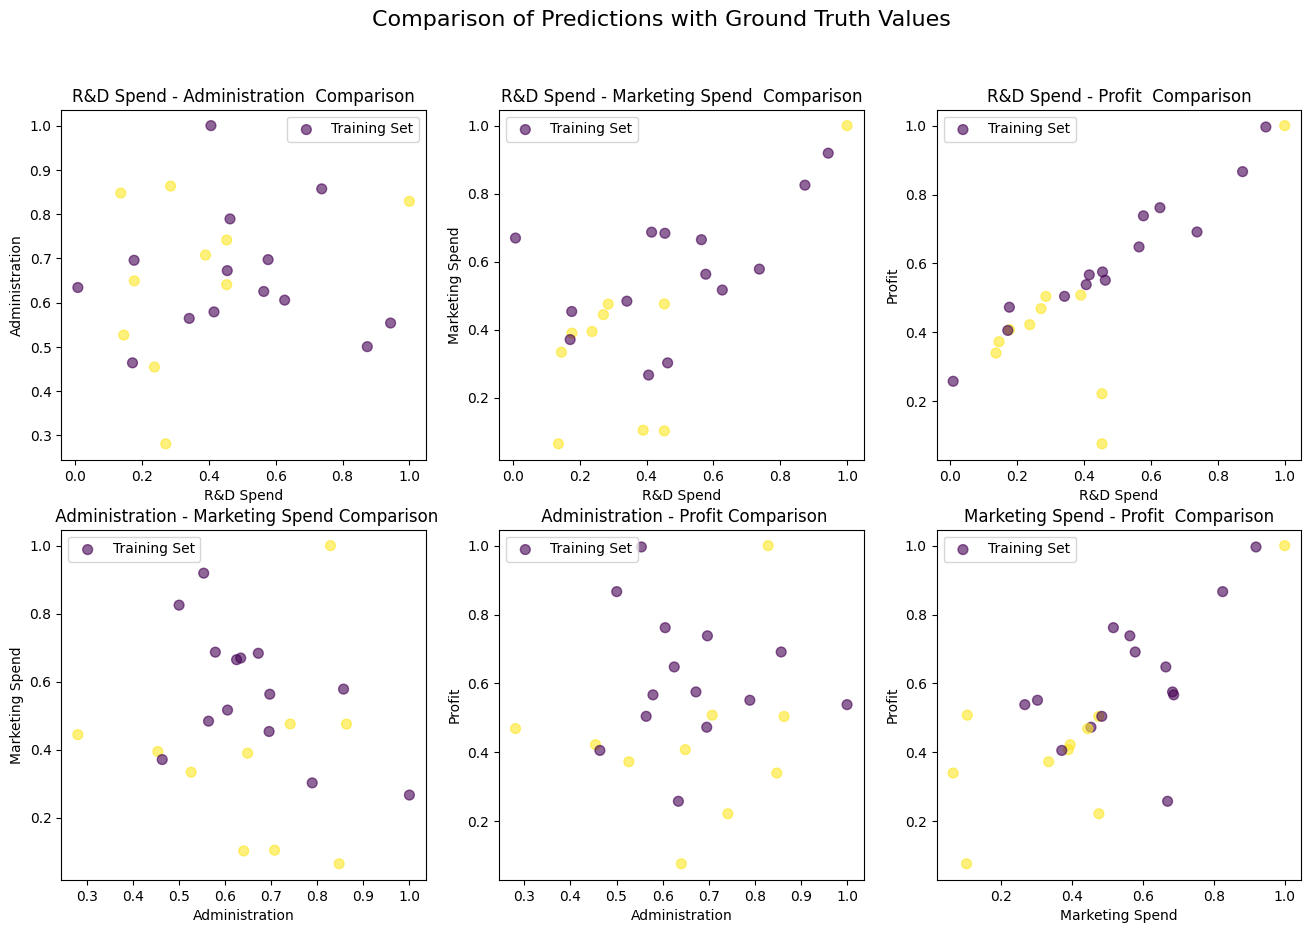

In [24]:

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

# Plotting predictions and ground-truth values from two different features from the training set (NOT VERY INFORMATIVE, poor dataset)
for i in range(3):
    axs[0, i].scatter(X_train[:, 0], X_train[:, i+1], c=y_train, cmap='viridis', s=50, alpha=0.6, label='Training Set')
    #axs[0, i].scatter(X_test[:, 0], X_test[:, i+1], c=y_test, cmap='viridis', s=50, alpha=0.6, marker='s', label='Predictions')
    
    # adding the hyperplane that separates the two classes
    x = np.linspace(-1, 1, 100)
    y = - (LR.coef_[0][0] * x + LR.intercept_) / LR.coef_[0][i+1]
    #axs[0, i].plot(x, y, color='black', linestyle='--', label='Hyperplane')    
    axs[0, i].set_xlabel('R&D Spend')
    axs[0, i].set_ylabel(df_fin.columns[i+2])
    axs[0, i].set_title(f'R&D Spend - {df_fin.columns[i+2]}  Comparison')
    axs[0, i].legend()


for i in range(2):
    axs[1, i].scatter(X_train[:, 1], X_train[:, i+2], c=y_train, cmap='viridis', s=50, alpha=0.6, label='Training Set')
    #axs[1, i].scatter(X_test[:, 1], X_test[:, i+2], c=y_test, cmap='viridis', s=50, alpha=0.6, marker='s', label='Predictions')
    
    x = np.linspace(-1, 1, 100)
    y = - (LR.coef_[0][1] * x + LR.intercept_) / LR.coef_[0][i+2]
    #axs[1, i].plot(x, y, color='black', linestyle='--', label='Hyperplane')
    
    axs[1, i].set_xlabel('Administration')
    axs[1, i].set_ylabel(df_fin.columns[i+3])
    axs[1, i].set_title(f' Administration - {df_fin.columns[i+3]} Comparison')
    axs[1, i].legend()
    
axs[1, 2].scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap='viridis', s=50, alpha=0.6, label='Training Set')
#axs[1, 2].scatter(X_test[:, 2], X_test[:, 3], c=y_test, cmap='viridis', s=50, alpha=0.6, marker='s', label='Predictions')
x = np.linspace(-1, 1, 100)
y = - (LR.coef_[0][2] * x + LR.intercept_) / LR.coef_[0][3]
#axs[1, 2].plot(x, y, color='black', linestyle='--', label='Hyperplane')
axs[1, 2].set_xlabel('Marketing Spend')
axs[1, 2].set_ylabel('Profit')
axs[1, 2].set_title('Marketing Spend - Profit  Comparison')
axs[1, 2].legend()

# Setting the title for the entire plot
fig.suptitle('Comparison of Predictions with Ground Truth Values', fontsize=16)
#plt.tight_layout()
plt.show()

***Add regularization***

Implement from scratch the regularized logistic regression model (with all the regularization techniques seen during the course).

In [25]:

def sigmoidM(x, w):
    y = 1/(1+np.exp(-np.matmul(x,w)))
    return y

In [26]:
def RidgeLogLoss(x, y, w, lam):
    n = np.shape(x)[0]
    return -(1/n)*np.sum(y*np.log(sigmoidM(x,w)) + (1-y)*np.log(1-sigmoidM(x,w))) + lam*LA.norm(w,2)

def RidgeGradient(w, lam):
    return 2*lam*w


In [27]:
def lassoGradient(w, lam):
    g = np.ones(w.shape)
    g[w < 0.] = -1.0
    return lam*g

def lassoLogLoss(x,y,w,lam):
    n = np.shape(x)[0]
    return -(1/n)*np.sum(y*np.log(sigmoidM(x,w)) + (1-y)*np.log(1-sigmoidM(x,w))) + lam*LA.norm(w,1)


In [28]:
def GDelNet(x, y, iter, gamma, lam, lamr):
    d = np.shape(x)
    loss = np.zeros(iter)
    np.random.seed(123)
    w =  np.random.uniform(0, 0.01, d[1])
    W = np.zeros((d[1], iter))
    for i in range(iter):
        W[:,i] = w
        w = w - (gamma) * ((2/d[0])*(np.transpose(x) @ (sigmoidM(x,w)-y)) + lamr * lassoGradient(w,lam) + (1-lamr) * RidgeGradient(w,lam))
        loss[i] = -(1/d[0])*np.sum(y*np.log(sigmoidM(x,w)) + (1-y)*np.log(1-sigmoidM(x,w))) + (1-lamr)* lam*LA.norm(w,2) + lamr*lam*LA.norm(w,2)

    return W,loss

***Model assessment***

Given true and predicted values, compute the most common classification metrics to assess the quality of your predictions.

In [29]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = LR.predict(X_test)

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))
print(y_pred)

              precision    recall  f1-score   support

  California       0.22      1.00      0.36         2
     Florida       0.00      0.00      0.00         7

    accuracy                           0.22         9
   macro avg       0.11      0.50      0.18         9
weighted avg       0.05      0.22      0.08         9

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Repeat the previous task for regularized logistic regression and compare the results.

In [30]:
def get_y_pred(X_train,y_train,X_test,iter,gamma,lam,lamr,soglia):
    W, loss = GDelNet(X_train,y_train,iter,gamma,lam,lamr)
    w = W[:,iter-1]
    y_pred = sigmoidM(X_test, w)
    y_pred[y_pred < soglia] = 0.
    y_pred[y_pred >= soglia] = 1.
    return y_pred, loss, w

def print_res(y_true,y_pred,w,loss):
    target_names = ['California', 'Florida']
    print(classification_report(y_true, y_pred, target_names=target_names))
    print(w)
    print(y_pred)
    plt.plot(loss)
    plt.xlabel("Iterazioni")
    plt.ylabel("Loss Value")
    plt.title("Grafico Della Loss")
    plt.show()


In [31]:
def con_matr(y_true,y_pred):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.show()

ridge

In [32]:
iter = 620
gamma = 1
lam = 0.0001

c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

  California       0.22      1.00      0.36         2
     Florida       0.00      0.00      0.00         7

    accuracy                           0.22         9
   macro avg       0.11      0.50      0.18         9
weighted avg       0.05      0.22      0.08         9

[ 1.10393539  2.13355361 -1.54500974 -3.00132281]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


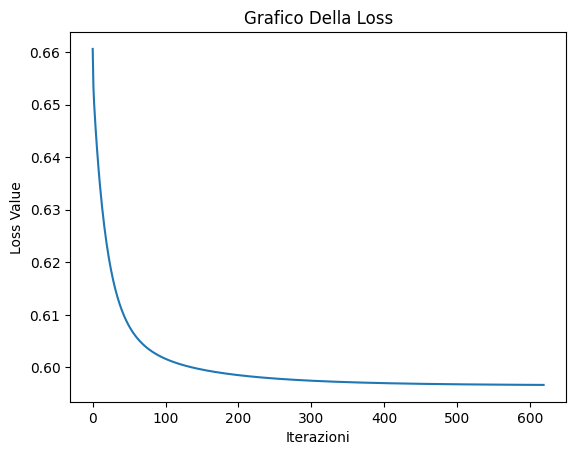

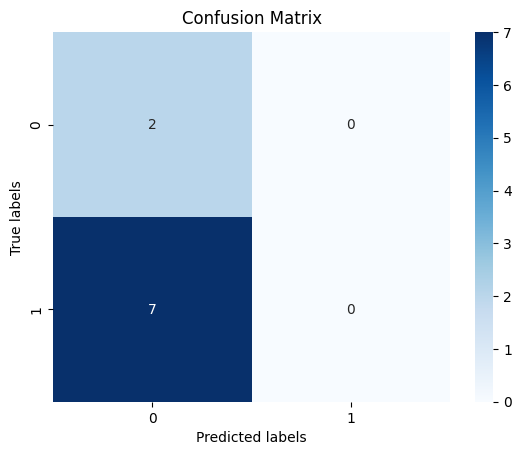

In [33]:
y_pred, loss, w = get_y_pred(X_train,y_train,X_test,iter,gamma,lam,0,0.5)
print_res(y_test,y_pred,w,loss)
con_matr(y_test,y_pred)

lasso

              precision    recall  f1-score   support

  California       0.22      1.00      0.36         2
     Florida       0.00      0.00      0.00         7

    accuracy                           0.22         9
   macro avg       0.11      0.50      0.18         9
weighted avg       0.05      0.22      0.08         9

[ 1.14848467  2.16078472 -1.5388303  -3.07631913]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

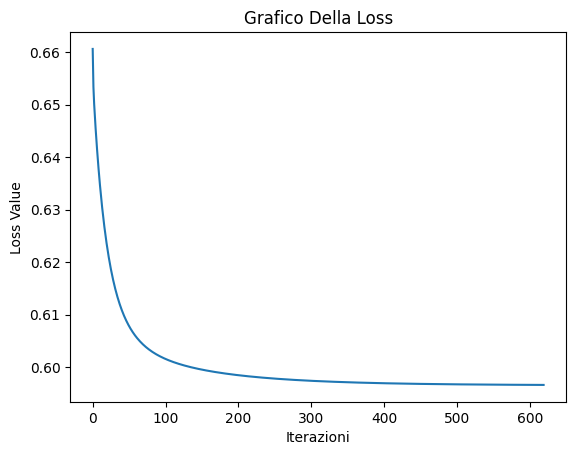

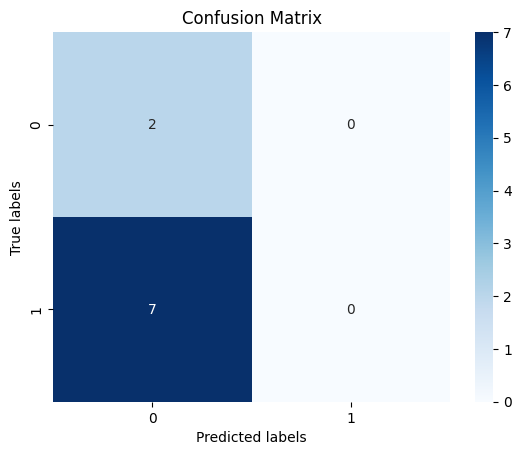

In [34]:
y_pred, loss, w = get_y_pred(X_train,y_train,X_test,iter,gamma,lam,1,0.5)
print_res(y_test,y_pred,w,loss)
con_matr(y_test,y_pred)

elnet

              precision    recall  f1-score   support

  California       0.22      1.00      0.36         2
     Florida       0.00      0.00      0.00         7

    accuracy                           0.22         9
   macro avg       0.11      0.50      0.18         9
weighted avg       0.05      0.22      0.08         9

[ 1.12582464  2.14701133 -1.54204459 -3.03820947]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

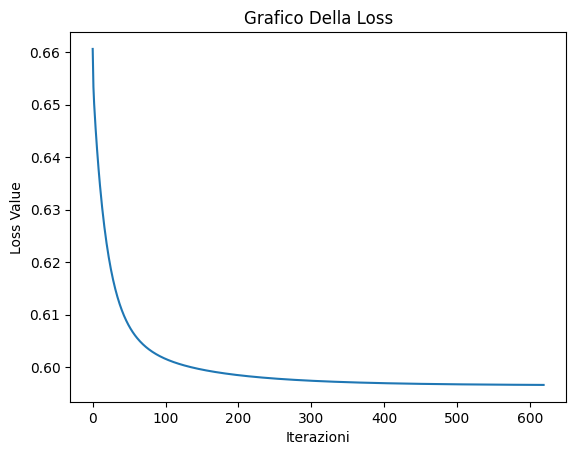

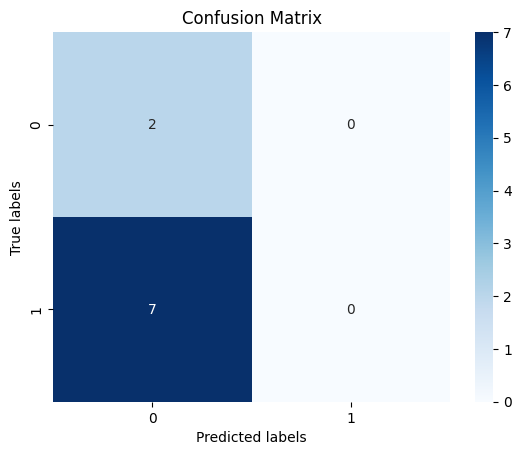

In [35]:
y_pred, loss, w = get_y_pred(X_train,y_train,X_test,iter,gamma,lam,0.5,0.5)
print_res(y_test,y_pred,w,loss)
con_matr(y_test,y_pred)

***ROC curve***

Implement a function for producing the Receiver Operating Characteristic (ROC) curve.

Given true and predicted values, plot the ROC curve using your implemented function.

In [36]:
def rocCurve(X_train,y_train,X_test,y_true,iter,gamma,lam,lamr):
    import copy
    Wr, loss = GDelNet(X_train,y_train,iter,gamma,lam,lamr)
    wr = Wr[:,iter-1]
    y_predr = sigmoidM(X_test, wr)
    tpr = []
    fpr = []
    soglie = copy.deepcopy(np.flip(np.sort(y_predr)))
    for soglia in soglie:
        y_pred = copy.deepcopy(y_predr)
        y_pred[y_predr < soglia] = 0.
        y_pred[y_predr >= soglia] = 1.
        tp = 0
        fp = 0
        for i, elem in enumerate(y_pred):
            if elem == y_true[i] and elem == 1.:
                tp = tp + 1
            if elem != y_true[i] and elem == 1.:
                fp = fp + 1 
        p = sum(y_true)
        n = len(y_true) - p
        tpr.append(tp/p)
        fpr.append(fp/n)
    plt.plot(fpr,tpr)
    plt.scatter(fpr, tpr)
    plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))
    plt.xlabel("False Positive Ratio")
    plt.ylabel("True Positive Ratio")
    plt.title("Roc Curve")
    plt.show()  
    return soglie
    


ridge roc

In [37]:
iter = 620
gamma = 0.0001
lam = 1

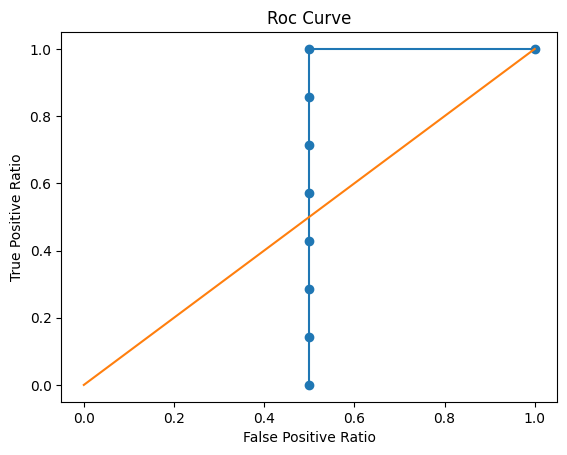

In [38]:
soglie = rocCurve(X_train,y_train,X_test,y_test,iter,gamma,lam,0)


              precision    recall  f1-score   support

  California       0.00      0.00      0.00         2
     Florida       0.78      1.00      0.88         7

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9

[-0.00162558 -0.00399498 -0.00816548 -0.00542885]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

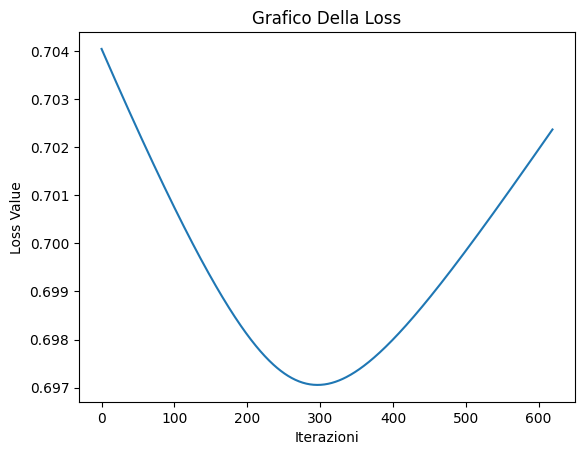

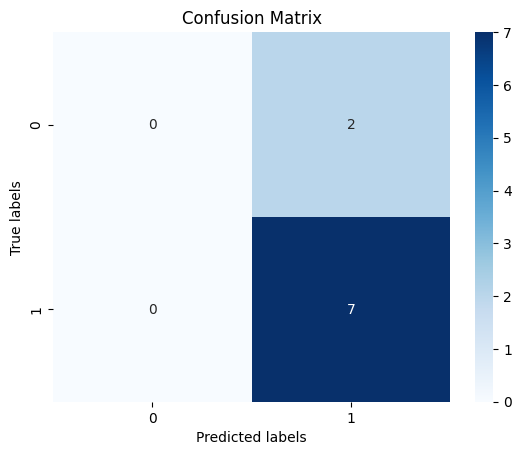

In [39]:
y_pred, loss, w = get_y_pred(X_train,y_train,X_test,iter,gamma,lam,0,soglie[8])
print_res(y_test,y_pred,w,loss)
con_matr(y_test,y_pred)

lasso roc

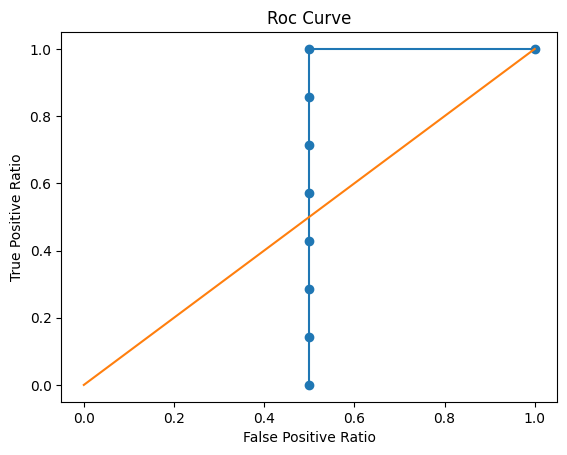

In [40]:
soglie = rocCurve(X_train,y_train,X_test,y_test,iter,gamma,lam,1)

              precision    recall  f1-score   support

  California       0.00      0.00      0.00         2
     Florida       0.78      1.00      0.88         7

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9

[-2.37288591e-05 -1.08953334e-06 -6.71017561e-05  3.91218456e-05]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

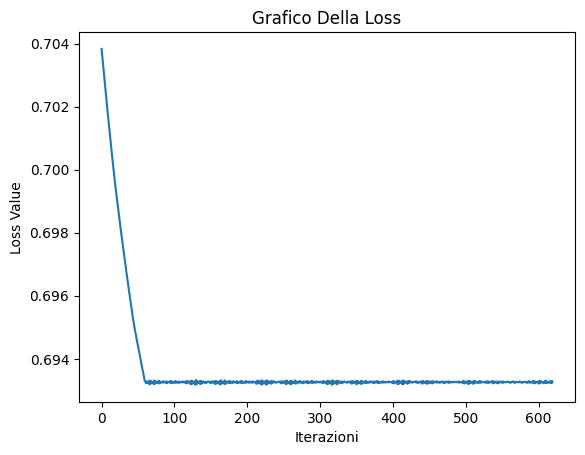

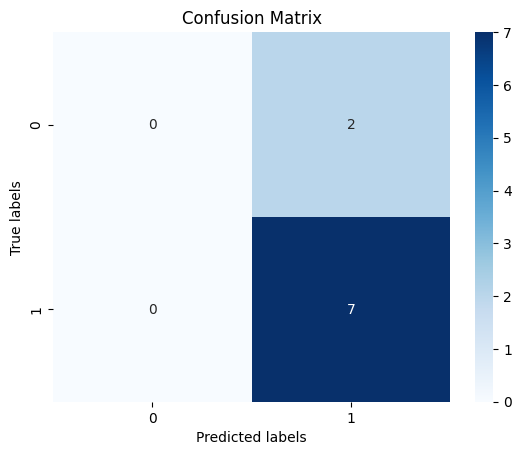

In [41]:
y_pred, loss, w = get_y_pred(X_train,y_train,X_test,iter,gamma,lam,1,soglia=soglie[8])
print_res(y_test,y_pred,w,loss)
con_matr(y_test,y_pred)

ElNet roc

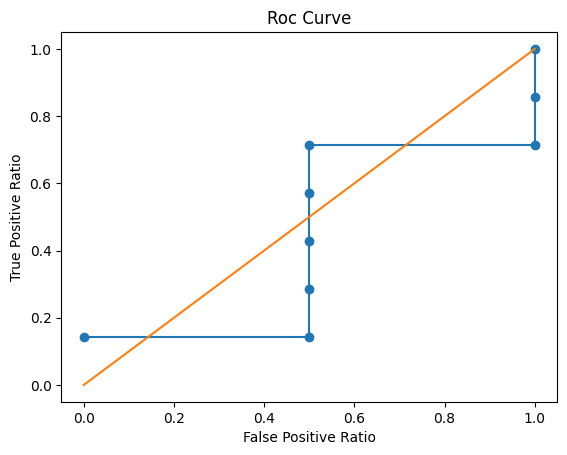

In [42]:
soglie = rocCurve(X_train,y_train,X_test,y_test,iter,gamma,lam,0.5)

              precision    recall  f1-score   support

  California       0.00      0.00      0.00         2
     Florida       0.71      0.71      0.71         7

    accuracy                           0.56         9
   macro avg       0.36      0.36      0.36         9
weighted avg       0.56      0.56      0.56         9

[-1.53052628e-05  3.77688681e-05 -2.41868626e-05 -3.71535962e-05]
[1. 1. 1. 1. 1. 0. 0. 1. 1.]


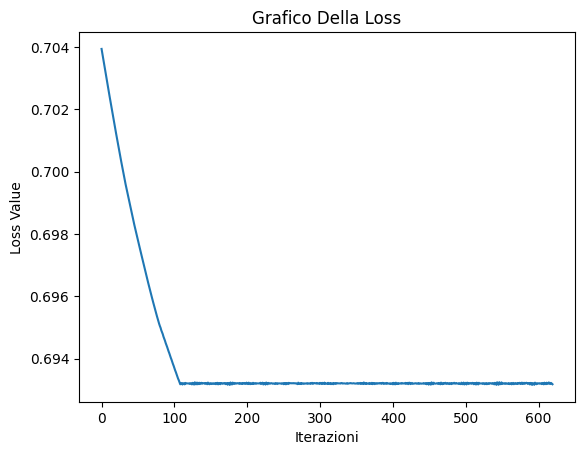

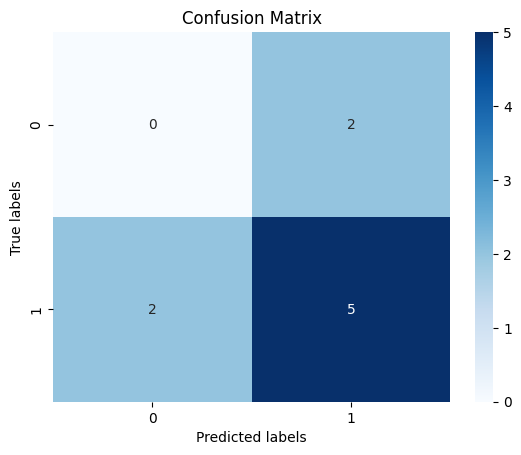

In [43]:
y_pred, loss, w = get_y_pred(X_train,y_train,X_test,iter,gamma,lam,0.5,soglia=soglie[6])
print_res(y_test,y_pred,w,loss)
con_matr(y_test,y_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

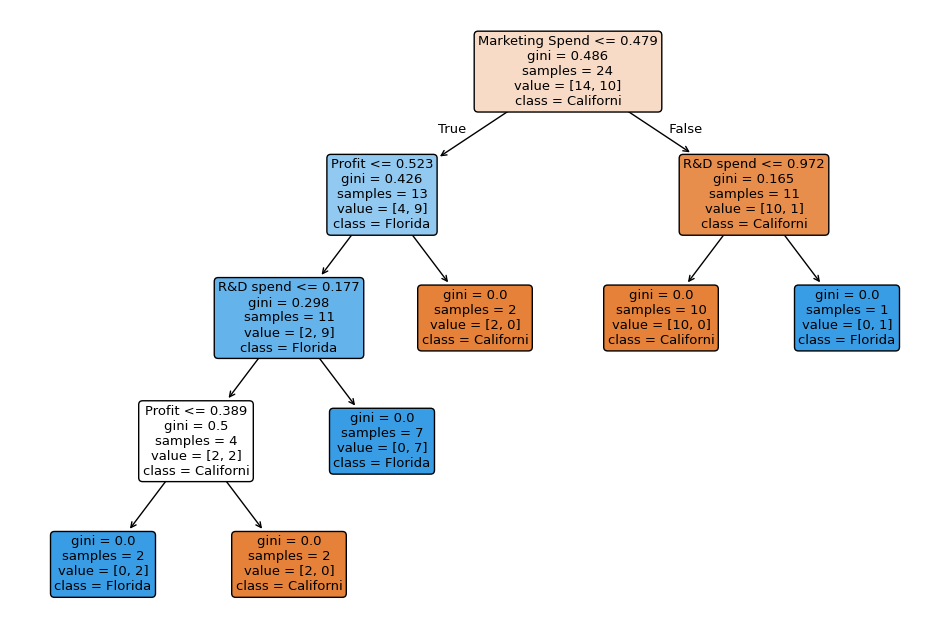

In [44]:

albero = tree.DecisionTreeClassifier()
albero.fit(X_train,y_train)
plt.figure(figsize=(12,8))
df = pd.DataFrame(X)
plot_tree(albero, filled=True,feature_names=["R&D spend","Administration","Marketing Spend","Profit"],class_names=["Californi","Florida"], rounded=True)
plt.show

              precision    recall  f1-score   support

  California       0.12      0.50      0.20         2
     Florida       0.00      0.00      0.00         7

    accuracy                           0.11         9
   macro avg       0.06      0.25      0.10         9
weighted avg       0.03      0.11      0.04         9



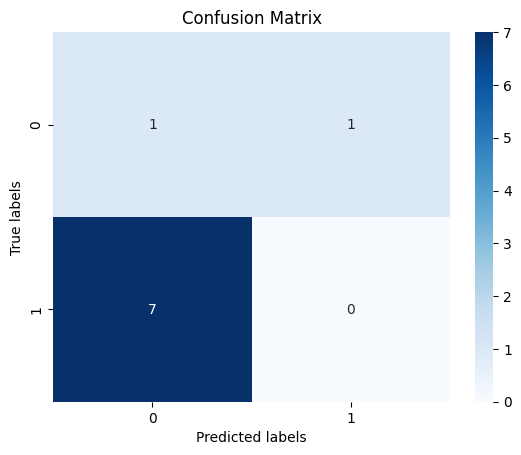

In [45]:
y_pred = albero.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["California","Florida"]))
con_matr(y_test,y_pred)

              precision    recall  f1-score   support

  California       0.22      1.00      0.36         2
     Florida       0.00      0.00      0.00         7

    accuracy                           0.22         9
   macro avg       0.11      0.50      0.18         9
weighted avg       0.05      0.22      0.08         9



c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

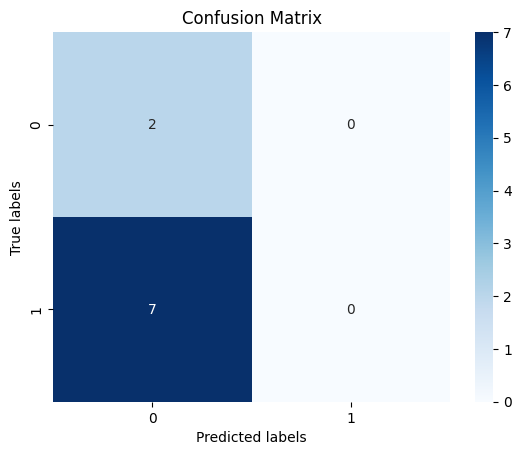

In [47]:
gnbC = CategoricalNB()
gnbC.fit(X_train,y_train)
y_pred = gnbC.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["California","Florida"]))
con_matr(y_test,y_pred)

              precision    recall  f1-score   support

  California       0.12      0.50      0.20         2
     Florida       0.00      0.00      0.00         7

    accuracy                           0.11         9
   macro avg       0.06      0.25      0.10         9
weighted avg       0.03      0.11      0.04         9



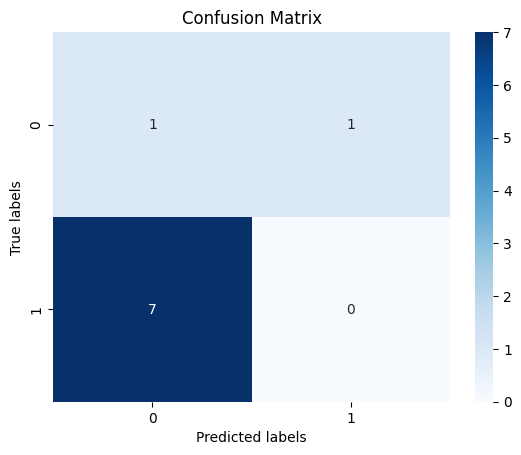

In [48]:
gnbC = GaussianNB()
gnbC.fit(X_train,y_train)
y_pred = gnbC.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["California","Florida"]))
con_matr(y_test,y_pred)

              precision    recall  f1-score   support

  California       0.22      1.00      0.36         2
     Florida       0.00      0.00      0.00         7

    accuracy                           0.22         9
   macro avg       0.11      0.50      0.18         9
weighted avg       0.05      0.22      0.08         9



c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

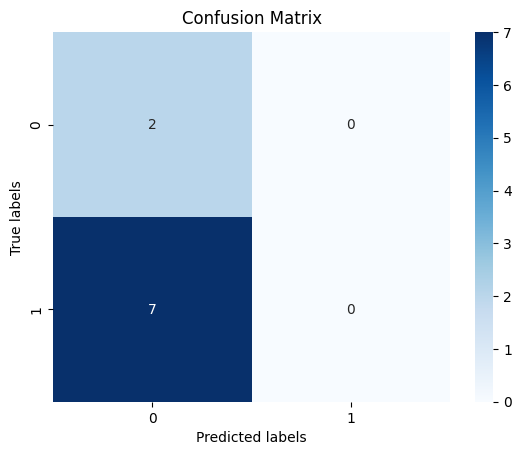

In [49]:
RandF = RandomForestClassifier(n_estimators=10)
RandF.fit(X_train,y_train)
y_pred = RandF.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["California","Florida"]))
con_matr(y_test,y_pred)